# Load basic libriaries


In [1]:
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid', font_scale = 1.5, color_codes=True)
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
sns.set_style(style='white')
%matplotlib inline

# Data pre-processing

In [2]:
# dataset can be download from https://www.kaggle.com/shivam2503/diamonds/home
df = pd.read_csv("diamonds.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


##  First look about diamond dataset


In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Drop an unnecessary column called "Unnamed"


In [4]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Remove missing values.

The minimum values for x,y and z here are 0 but it is not possible because according to the data description they are the length, width and depth.

In [5]:
print("Number of rows with x == 0: {} ".format((df.x==0).sum()))
print("Number of rows with y == 0: {} ".format((df.y==0).sum()))
print("Number of rows with z == 0: {} ".format((df.z==0).sum()))
print("Number of rows with depth == 0: {} ".format((df.depth==0).sum()))

Number of rows with x == 0: 8 
Number of rows with y == 0: 7 
Number of rows with z == 0: 20 
Number of rows with depth == 0: 0 


In [6]:
df[['x','y','z']] = df[['x','y','z']].replace(0,np.NaN)
df.dropna(inplace=True)

In [7]:
print("New dataset shape: {}".format(df.shape))
df.isnull().sum()

New dataset shape: (53920, 10)


carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

## Correlation heatmap

<AxesSubplot:>

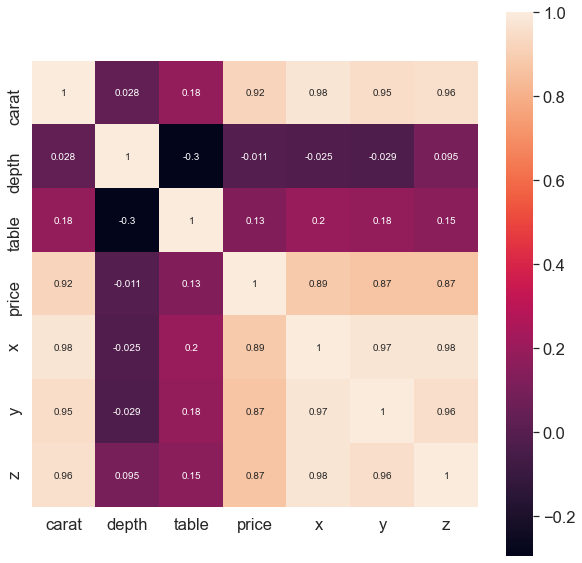

In [8]:
plt.figure(figsize=(10, 10))
# calculate the correlation matrix
corr = df.corr()
sns.heatmap(
    corr, 
    annot=True,
    square=True
)

**Observations**

- $x$, $y$, $z$, and $carat$ have a strong relation with $price$;
- $table$ has medium relation with $price$;
- $depth$ does not have a significant relation with $price$;

## Distribution of each feature

array([[<AxesSubplot:title={'center':'carat'}>,
        <AxesSubplot:title={'center':'depth'}>,
        <AxesSubplot:title={'center':'table'}>],
       [<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>],
       [<AxesSubplot:title={'center':'z'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

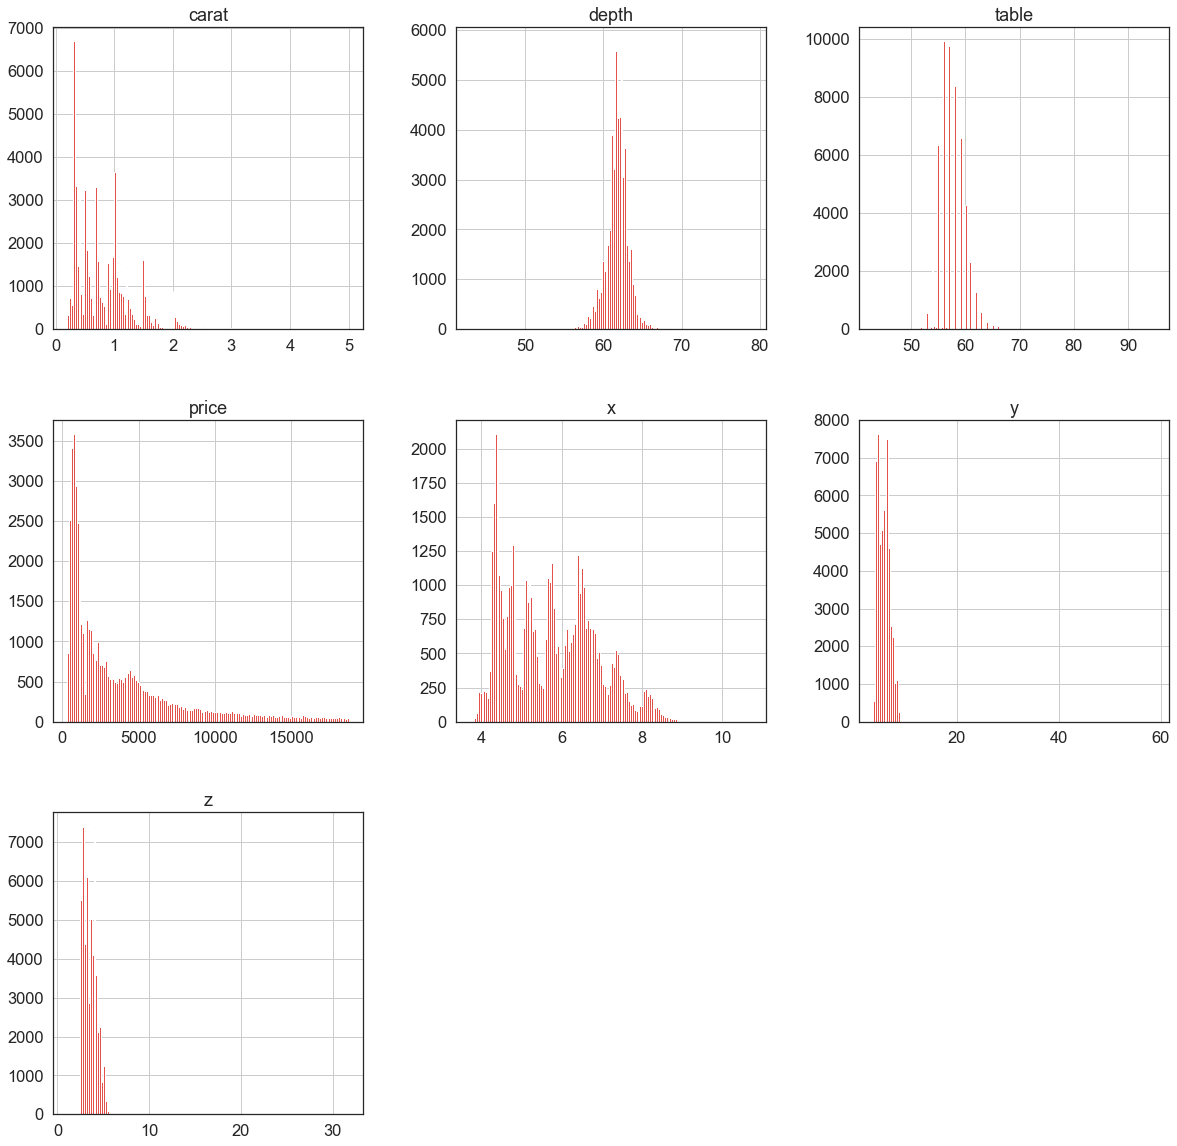

In [9]:
df.hist(figsize=(20, 20), bins=150)

## Boxplot and Remove outliers 


In [10]:
def plot_boxplot(df, features):
    """
    Plot boxplot for all features
    """    
    fig = plt.figure(figsize=(15, 15))
    for i in range(6):
        sns.boxplot(data=df[features[i]], ax=fig.add_subplot(2, 3, i+1))
        plt.ylabel("Price")
        plt.xlabel(features[i])
    plt.show()

In [11]:
col_names = df.columns.tolist()
col_names.remove("price")
numerical_cols = list(df.select_dtypes(include=[np.number]).columns)
numerical_cols.remove("price")

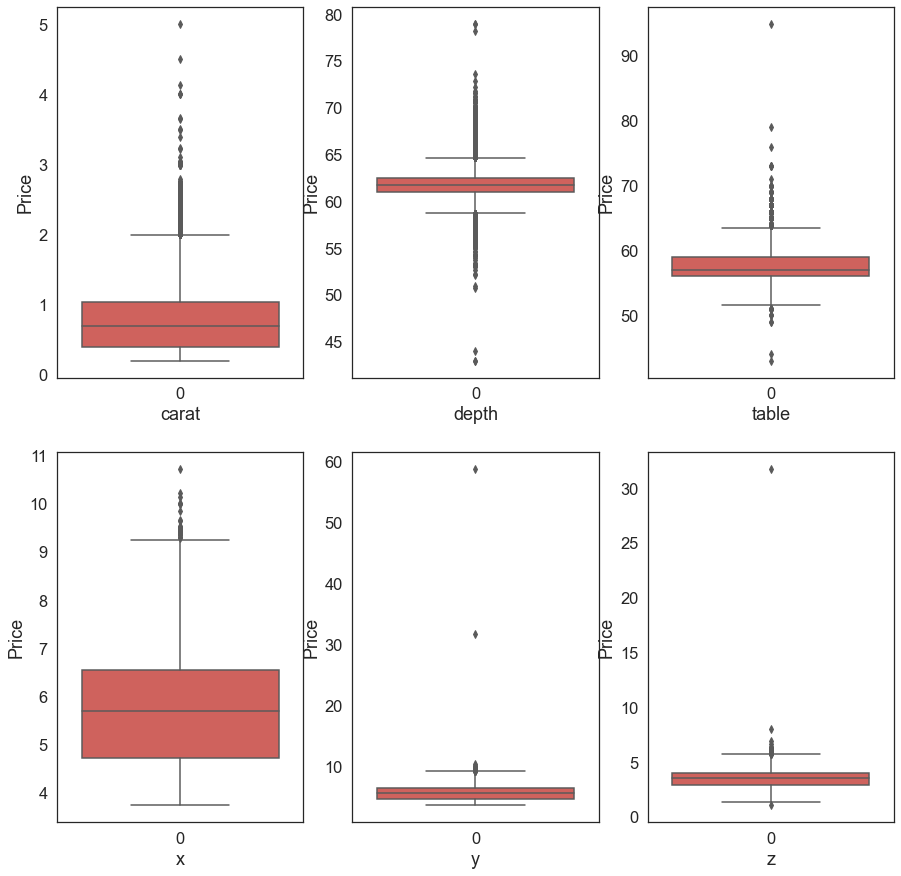

In [12]:
# boxplot before removing outliers
plot_boxplot(df, numerical_cols)

In [13]:
# Remove outliers lie out of 3 sigma

from scipy import stats

def removeoutliers(df, features, z):
    """
    Reomve outliers
    """
    for var in features:
        df_new = df[np.abs(stats.zscore(df[var])) < z]
    return df_new

df = removeoutliers(df, numerical_cols, 3)

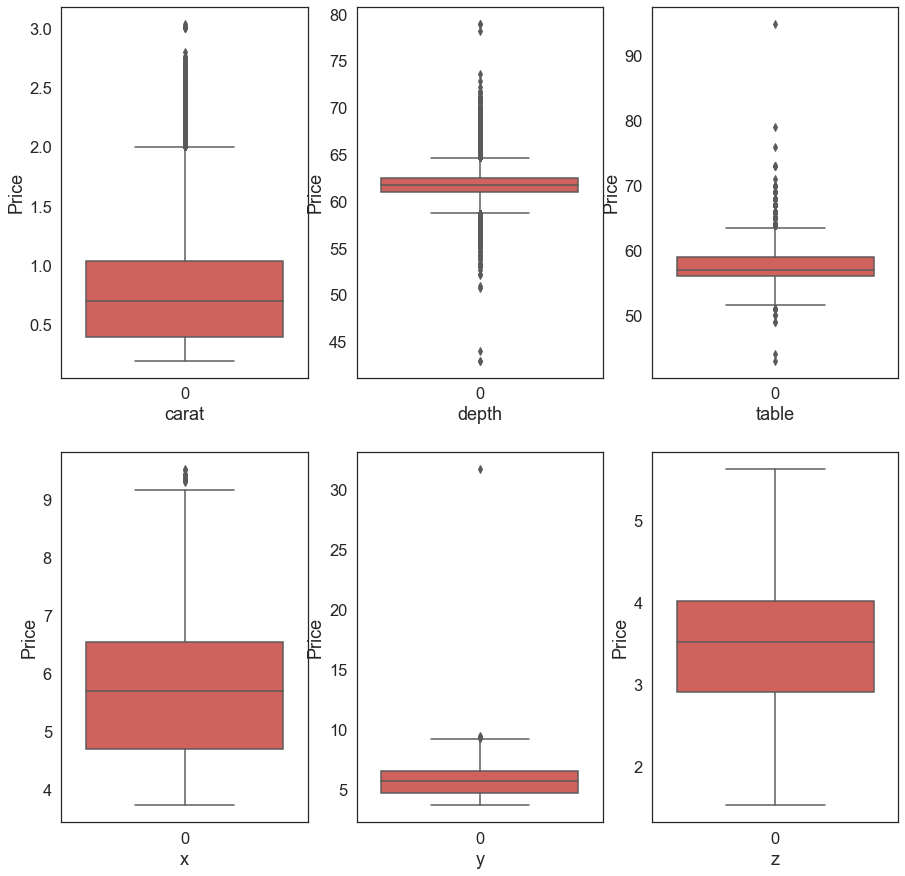

In [14]:
plot_boxplot(df, numerical_cols)

## Convert categorical label

In [15]:
# categorical label
print("Cut: {}".format(set(df["cut"])))
print("Color: {}".format(set(df["color"])))
print("Clarity: {}".format(set(df["clarity"])))

Cut: {'Ideal', 'Fair', 'Premium', 'Good', 'Very Good'}
Color: {'F', 'H', 'D', 'J', 'I', 'E', 'G'}
Clarity: {'IF', 'I1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'SI1', 'SI2'}


In [16]:
encode_df = pd.get_dummies(df)
encode_df.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0


In [17]:
def convert_catg(df):
    """
    convert categorical label to numerical label
    """
    encoder = preprocessing.LabelEncoder()
 
    # Find the columns of object type along with their column index
    object_cols = list(df.select_dtypes(exclude=[np.number]).columns)
    object_cols_ind = []
    for col in object_cols:
        object_cols_ind.append(df.columns.get_loc(col))
    
    # Encode the categorical columns with numbers 
    for i in object_cols_ind:
        df.iloc[:,i] = encoder.fit_transform(df.iloc[:,i])

In [18]:
convert_catg(df)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


## Scaling

In [19]:
X_df = encode_df.drop(["price"],axis=1)
y_df = encode_df.price

# scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_df)
print(X_df.shape)
display(X_df.head())
X_df = scaler.transform(X_df)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, random_state = 2,test_size=0.3)

(53884, 26)


,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,4.34,4.35,2.75,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0


# Model training

In [20]:
encode_df.dtypes

carat            float64
depth            float64
table            float64
price              int64
x                float64
y                float64
z                float64
cut_Fair           uint8
cut_Good           uint8
cut_Ideal          uint8
cut_Premium        uint8
cut_Very Good      uint8
color_D            uint8
color_E            uint8
color_F            uint8
color_G            uint8
color_H            uint8
color_I            uint8
color_J            uint8
clarity_I1         uint8
clarity_IF         uint8
clarity_SI1        uint8
clarity_SI2        uint8
clarity_VS1        uint8
clarity_VS2        uint8
clarity_VVS1       uint8
clarity_VVS2       uint8
dtype: object

In [21]:
df['depth'].describe()

count    53884.000000
mean        61.748165
std          1.430790
min         43.000000
25%         61.000000
50%         61.800000
75%         62.500000
max         79.000000
Name: depth, dtype: float64

## Linear regression

In [22]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

reg_lr = linear_model.LinearRegression()
reg_lr.fit(X_train, y_train)
y_pred = reg_lr.predict(X_test)

print("Mean absolute error: {:.2f}".format(mean_absolute_error(y_test, y_pred)))
print("Mean squared error: {:.2f}".format(mean_squared_error(y_test, y_pred)))
print("R-Squared: {:.2f}".format(r2_score(y_test,y_pred)))

Mean absolute error: 712.66
Mean squared error: 1176664.07
R-Squared: 0.92


In [23]:
coeff_df = pd.DataFrame(col_names)
coeff_df.columns = ["Variable"]
coeff_df["Coeff"] = pd.Series(reg_lr.coef_)
ret = coeff_df.sort_values(by="Coeff", ascending=False)
display(ret)
print("Intercept: {:.2f}".format(reg_lr.intercept_))

,Variable,Coeff
8,z,1.288653e+14
7,y,7.563015e+13
6,x,4.458566e+13
0,carat,5.841637e+03
4,depth,3.310805e+02
1,cut,3.617606e+01
2,color,-6.590878e+01
3,clarity,-6.842984e+02
5,table,-1.321224e+03


Intercept: 3921.24


Text(0, 0.5, 'Prediction')

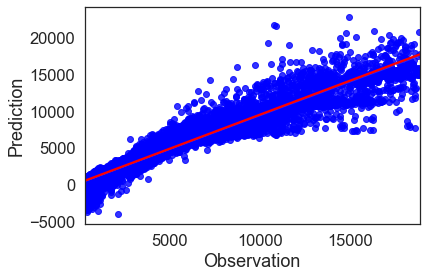

In [24]:
sns.regplot(y_test, y_pred,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.xlabel("Observation")
plt.ylabel("Prediction")

<AxesSubplot:xlabel='price', ylabel='Density'>

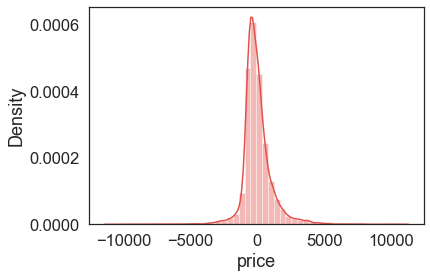

In [25]:
sns.distplot((y_test-y_pred),bins=50)

## Random Forest

In [26]:
from sklearn.ensemble import RandomForestRegressor

reg_rf = RandomForestRegressor(n_estimators = 100)
reg_rf.fit(X_train,y_train.values.ravel())
y_pred = reg_rf.predict(X_test)

print("Mean absolute error: {:.2f}".format(mean_absolute_error(y_test, y_pred)))
print("Mean squared error: {:.2f}".format(mean_squared_error(y_test, y_pred)))
print("R-Squared: {:.2f}".format(r2_score(y_test,y_pred)))

Mean absolute error: 271.20
Mean squared error: 287885.22
R-Squared: 0.98


In [27]:
print(y_test[:5].values)
print(np.around(y_pred[:5]))

[7774 2487 2229 4732 2210]
[7640. 2378. 1907. 5411. 2179.]


Text(0, 0.5, 'Prediction')

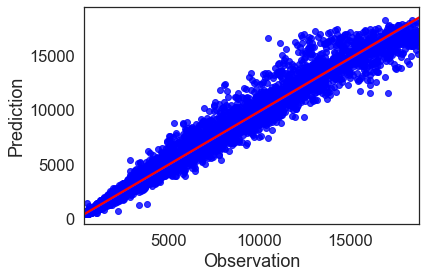

In [28]:
sns.regplot(y_test,y_pred, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.xlabel("Observation")
plt.ylabel("Prediction")

<AxesSubplot:xlabel='price', ylabel='Density'>

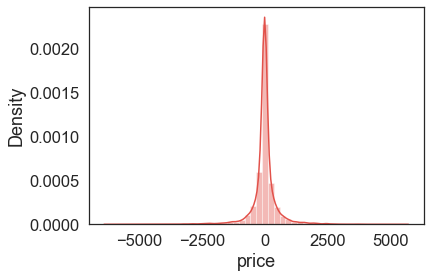

In [29]:
# Residual Histogram
sns.distplot((y_test-y_pred),bins=50)

In [30]:
importances = reg_rf.feature_importances_
importance_df = pd.DataFrame(col_names)
importance_df.columns = ["Variable"]
importance_df["Importances"] = pd.Series(importances)
ret = importance_df.sort_values(by="Importances", ascending=False)
display(ret)

,Variable,Importances
0,carat,0.563934
4,depth,0.319803
3,clarity,0.007265
5,table,0.004967
1,cut,0.003064
2,color,0.002189
8,z,0.001005
7,y,0.000219
6,x,0.000167


## Neural Networks

In [31]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [32]:
# define a neural network
def Net():
    model = Sequential()
    model.add(Dense(input_dim=26, activation="relu", units=18))
    model.add(Dense(kernel_initializer="normal", activation="relu", units=12))
    model.add(Dense(kernel_initializer="normal", units=1))
    model.compile(loss="mean_squared_error", optimizer="adam")
    return model

In [33]:
estimator = KerasRegressor(build_fn=Net, epochs=10, batch_size=5)
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)

Epoch 1/10
7544/7544 [==============================] - 4s 480us/step - loss: 13854367.9734
Epoch 2/10
7544/7544 [==============================] - 4s 481us/step - loss: 798712.8278
Epoch 3/10
7544/7544 [==============================] - 4s 498us/step - loss: 731040.0420
Epoch 4/10
7544/7544 [==============================] - 4s 470us/step - loss: 650127.7049
Epoch 5/10
7544/7544 [==============================] - 4s 471us/step - loss: 598072.9709
Epoch 6/10
7544/7544 [==============================] - 4s 495us/step - loss: 507491.2240
Epoch 7/10
7544/7544 [==============================] - 4s 477us/step - loss: 529724.1581
Epoch 8/10
7544/7544 [==============================] - 4s 511us/step - loss: 534306.5178
Epoch 9/10
7544/7544 [==============================] - 4s 479us/step - loss: 477626.6643
Epoch 10/10
7544/7544 [==============================] - 4s 552us/step - loss: 506457.7623


In [34]:
print("Mean absolute error: {:.2f}".format(mean_absolute_error(y_test, y_pred)))
print("Mean squared error: {:.2f}".format(mean_squared_error(y_test, y_pred)))
print("R-Squared: {:.2f}".format(r2_score(y_test,y_pred)))

Mean absolute error: 360.05
Mean squared error: 425508.14
R-Squared: 0.97


Text(0, 0.5, 'Prediction')

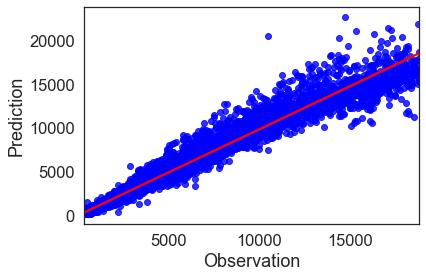

In [35]:
sns.regplot(y_test,y_pred, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.xlabel("Observation")
plt.ylabel("Prediction")

<AxesSubplot:xlabel='price', ylabel='Density'>

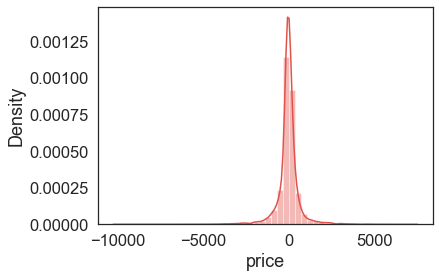

In [36]:
# Residual Histogram
sns.distplot((y_test-y_pred),bins=50)

# Clustering

## Two-dimensional clustering (carat, clarity) - KMeans


Counter({2: 30309, 0: 14135, 3: 6040, 1: 3400})


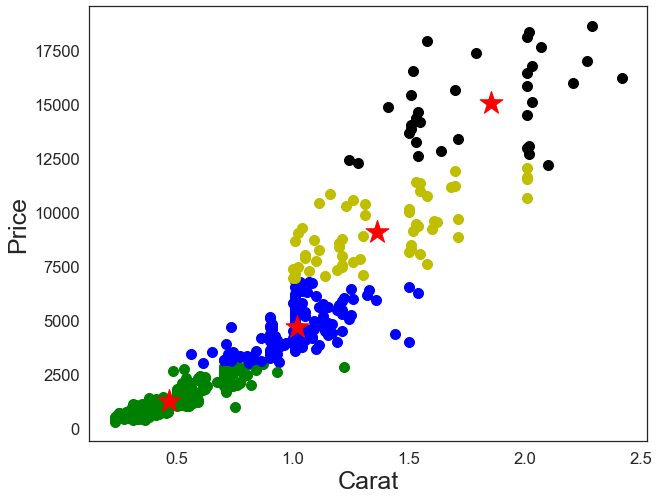

In [37]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from collections import Counter

X = np.array(df[['carat', 'price']])
y = np.array(df[['price']])

km = KMeans(n_clusters=4, random_state=0)
km.fit(X)
centers = km.cluster_centers_

# km_labels = pairwise_distances_argmin(X, centers)
km_labels = km.predict(X)
labels_dict = Counter(km_labels)
print (labels_dict)

fig = plt.figure(figsize=(10, 8))
for i in range(0, X.shape[0], 100):
    label = km_labels[i]
#     plt.text(X[i, 0], X[i, 1], X[i, :], size=20)
    if label == 0:
        plt.scatter(X[i, 0], X[i, 1], c='b', marker='o', s=100)
    elif label == 1:
        plt.scatter(X[i, 0], X[i, 1], c='k', marker='o', s=100)
    elif label == 2:
        plt.scatter(X[i, 0], X[i, 1], c='g', marker='o', s=100)
    else:
        plt.scatter(X[i, 0], X[i, 1], c='y', marker='o', s=100)

plt.scatter(centers[0, 0], centers[0, 1], c='r', marker='*', s=580)
plt.scatter(centers[1, 0], centers[1, 1], c='r', marker='*', s=580)
plt.scatter(centers[2, 0], centers[2, 1], c='r', marker='*', s=580)
plt.scatter(centers[3, 0], centers[3, 1], c='r', marker='*', s=580)

plt.xlabel('Carat', fontsize=25)
plt.ylabel('Price', fontsize=25)
plt.savefig('2-Dim clustering.jpg', dpi=300)

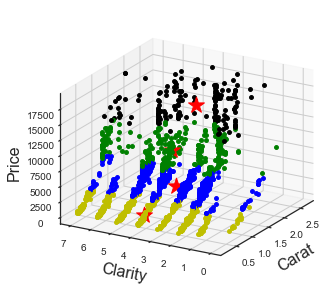

In [38]:
# from MyAxes3D import MyAxes3D
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation

fig = plt.figure()
sns.set_style(style='white')
ax = p3.Axes3D(fig)
# ax = fig.add_axes(MyAxes3D(ax, 'l'))
ax.set_proj_type('ortho')

ax.set_xlabel("Carat", fontsize=16, labelpad=6)
ax.set_ylabel("Clarity", fontsize=16, labelpad=6)
ax.set_zlabel("Price", fontsize=16, labelpad=6)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.view_init(elev=20., azim=210)

X = np.array(df[["carat", "clarity", "price"]])
y = np.array(df[["price"]])

km = KMeans(n_clusters=4, random_state=0)
km.fit(X)
km_labels = km.predict(X)

centers = km.cluster_centers_

for i in range(0, X.shape[0], 20):
    label = km_labels[i]
    if label == 0:
        ax.scatter(X[i, 0], X[i, 1], X[i, 2], c='b', marker='o', s=15)
    elif label == 1:
        ax.scatter(X[i, 0], X[i, 1], X[i, 2], c='k', marker='o', s=15)
    elif label == 2:
        ax.scatter(X[i, 0], X[i, 1], X[i, 2], c='g', marker='o', s=15)
    else:
        ax.scatter(X[i, 0], X[i, 1], X[i, 2], c='y', marker='o', s=15)

ax.scatter(centers[0, 0], centers[0, 1], centers[0, 2], c='r', marker='*', s=280)
ax.scatter(centers[1, 0], centers[1, 1], centers[1, 2], c='r', marker='*', s=280)
ax.scatter(centers[2, 0], centers[2, 1], centers[2, 2], c='r', marker='*', s=280)
ax.scatter(centers[3, 0], centers[3, 1], centers[3, 2], c='r', marker='*', s=280)

plt.savefig('3-Dim clustering1.jpg', dpi=300)

In [39]:
centers

array([[1.01286889e+00, 3.30559887e+00, 4.66780411e+03],
       [1.84979610e+00, 3.67958054e+00, 1.50001585e+04],
       [1.35941263e+00, 4.06595570e+00, 9.02176620e+03],
       [4.62002579e-01, 4.05703233e+00, 1.29402549e+03]])

# New Data Test

In [40]:
# # test a new dataset
# test_df = pd.read_csv("test.csv")

# display(test_df.head())

# test_df.drop("Unnamed: 0", axis=1, inplace=True)
# test_df[["x","y","z"]] = test_df[["x","y","z"]].replace(0, np.NaN)
# test_df.dropna(inplace=True)

# convert_catg(test_df)
# display(test_df.head())
# # X_test_df = test_df.drop(["price"], axis=1)
# X_test_df = scaler.transform(test_df)
# # reg_rf = RandomForestRegressor(n_estimators = 10)
# # reg_rf.fit(X_train, y_train.values.ravel())

# y_test_pred = reg_rf.predict(X_test_df)
# print("Prediction: {}".format(y_test_pred))

In [41]:
from joblib import dump, load

In [42]:
dump(reg_rf, 'diamond-price-prediction-model.joblib')

['diamond-price-prediction-model.joblib']

In [43]:
reg_rf = load('diamond-price-prediction-model.joblib')

In [44]:
dump(km, 'diamond-price-prediction-cluster.joblib')

['diamond-price-prediction-cluster.joblib']